> Radif Ramadan

> Data Science / JCSDOL-014

> Modul 2 - Task 26

---
---

In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# **Data Cleaning**

In [34]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
# Handle missing values
df.fillna({"director": "Unknown", "cast": "Unknown", "country": "Unknown", "date_added": "Unknown", "rating": "Unknown"}, inplace=True)

In [36]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [37]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [38]:
# Display updated dataset info
df.info(), duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7689 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


(None, 0)

In [39]:
df[df.director.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


# **Data Preprocessing**

In [40]:
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)
df['num_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in x else None)
df[['duration', 'duration_minutes', 'num_seasons']].head()


,duration,duration_minutes,num_seasons
0,4 Seasons,NaN,4.0
1,93 min,93.0,NaN
2,78 min,78.0,NaN
3,80 min,80.0,NaN
4,123 min,123.0,NaN


In [41]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,num_seasons
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,4.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,NaN
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,NaN
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,NaN
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,NaN
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,NaN,1.0
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",95.0,NaN
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,119.0,NaN
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",118.0,NaN
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,143.0,NaN


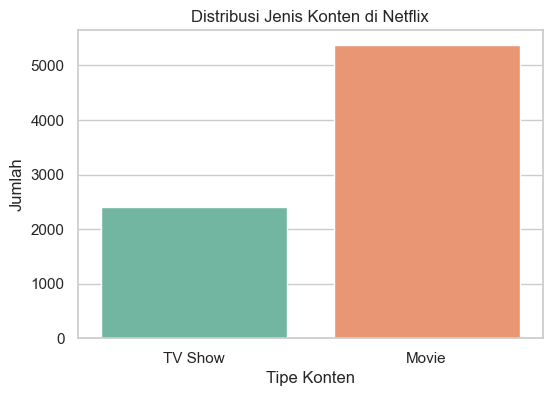

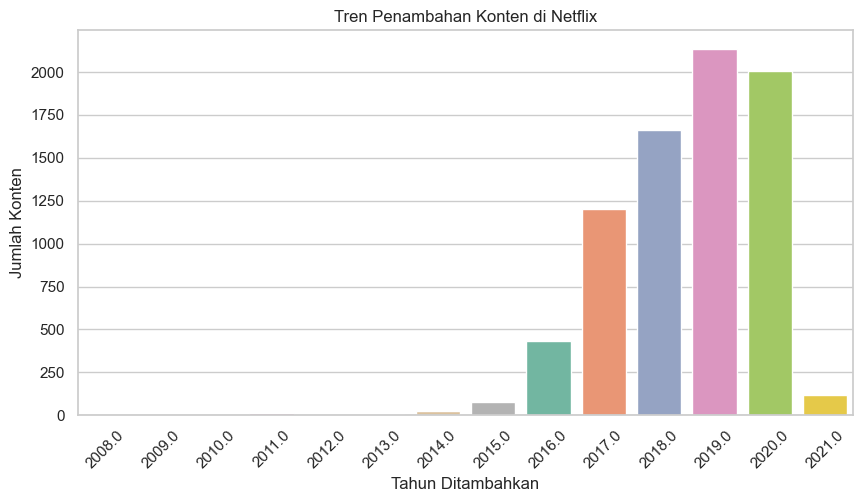

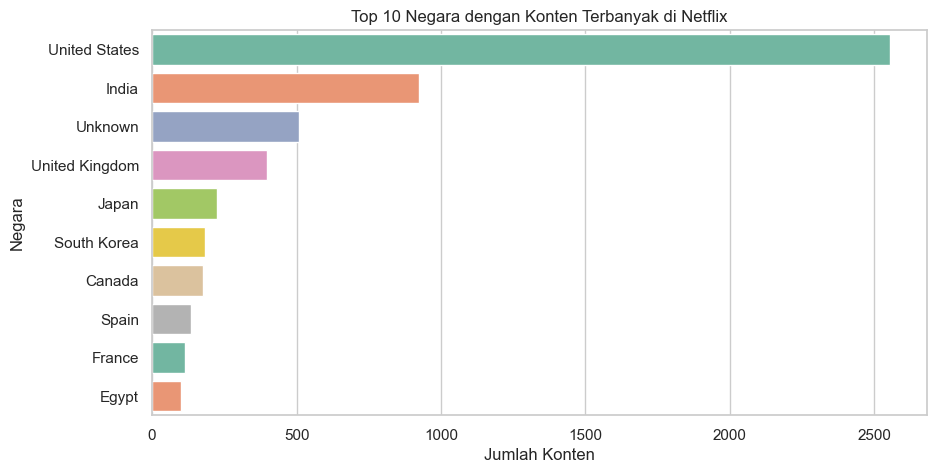

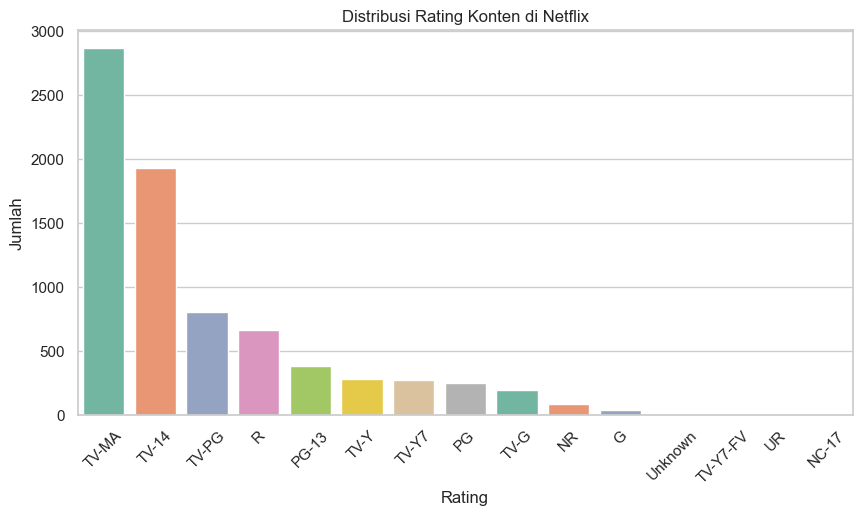

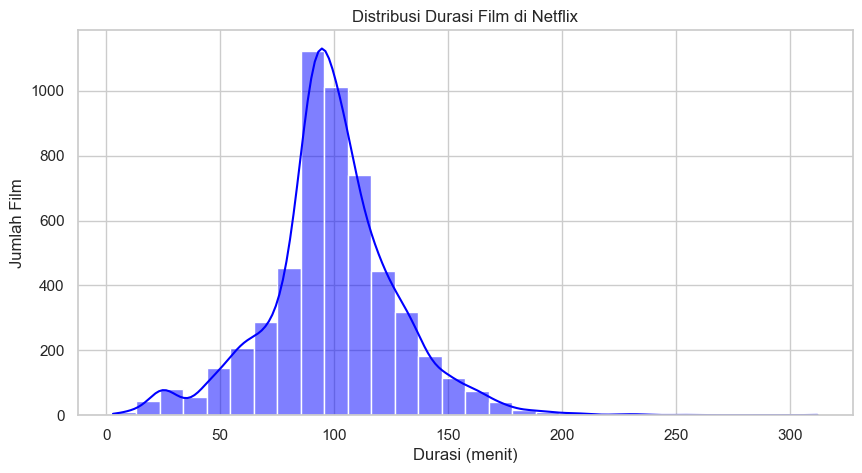

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Distribusi antara Film dan TV Show
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette="Set2")
plt.title("Distribusi Jenis Konten di Netflix")
plt.xlabel("Tipe Konten")
plt.ylabel("Jumlah")
plt.show()

# 2. Tren jumlah penambahan konten setiap tahun
plt.figure(figsize=(10, 5))
df['year_added'] = df['date_added'].dt.year
sns.countplot(data=df, x='year_added', palette="Set2", order=sorted(df['year_added'].dropna().unique()))
plt.title("Tren Penambahan Konten di Netflix")
plt.xlabel("Tahun Ditambahkan")
plt.ylabel("Jumlah Konten")
plt.xticks(rotation=45)
plt.show()

# 3. Top 10 negara dengan konten terbanyak
plt.figure(figsize=(10, 5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Set2")
plt.title("Top 10 Negara dengan Konten Terbanyak di Netflix")
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.show()

# 4. Distribusi rating
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', palette="Set2", order=df['rating'].value_counts().index)
plt.title("Distribusi Rating Konten di Netflix")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

# 5. Durasi film dalam menit
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_minutes'].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribusi Durasi Film di Netflix")
plt.xlabel("Durasi (menit)")
plt.ylabel("Jumlah Film")
plt.show()
